A) The network analyzed here is a Protein-Protein Interaction (PPI) network from C. elegans. The dataset comes from Simonis et al., 2009. This dataset was obtained by a high-throughput yeast two-hybrid (Y2H) screening system. Each node in the dataset is a protein and the edges are interactions obtained from the experiment. The network is undirected and is unweighted. This network is only 3-4% complete, Y2H screening is not very sensitive and would need to be run multilpe times in order to accurately uncover PPI of the organism; however even then, some PPI would still not be detectable

In [1]:
import networkx as nx
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset = pd.read_csv('wi8.txt', sep='\t')

In [3]:
dataset = dataset.iloc[:,[0,1]]

In [4]:
dataset.head()

,#IDA,IDB
0,AC3.10,AC3.3
1,AC3.3,C03A7.14
2,AC3.3,C03A7.4
3,AC3.3,C05D2.1
4,AC3.3,C37C3.6


In [5]:
dataset.tail()

,#IDA,IDB
3859,ZK829.7,ZK829.7
3860,ZK849.2,ZK849.2
3861,ZK849.2,ZK938.2
3862,ZK858.4,ZK858.4
3863,ZK945.2,ZK945.2


In [6]:
graph = nx.from_pandas_dataframe(dataset, '#IDA', 'IDB')

In [7]:
graph.number_of_nodes()

2528

In [8]:
graph.number_of_edges()

3864

In [9]:
# Remove self-loops, k-core cannot be calculated without them removed
graph.remove_edges_from(graph.selfloop_edges())

In [10]:
graph.number_of_nodes()

2528

In [11]:
graph.number_of_edges()

3706

B) Below are the NetworkX functions that generated the centrality metrics. The alpha parameters I used for Katz were: 0.1, 0.2, 0.01, 0.001, 0.4

In [12]:
degree = nx.degree_centrality(graph)
#The graph is unweighted, so the following calculations of 'in' or 'out' degrees do not work
#nx.in_degree_centrality(graph)
#nx.out_degree_centrality(graph)
closeness = nx.closeness_centrality(graph)
harmonic = nx.harmonic_centrality(graph)
betweenness = nx.betweenness_centrality(graph)
eigenvector = nx.eigenvector_centrality(graph)
# Numpy version of katz_centrality did not have max_iteration parameter that caused problems if not chosen carefully
katz_01 = nx.katz_centrality_numpy(graph, alpha=0.1)
katz_02 = nx.katz_centrality_numpy(graph, alpha=0.2)
katz_001 = nx.katz_centrality_numpy(graph, alpha=0.01)
katz_0001 = nx.katz_centrality_numpy(graph, alpha=0.001)
katz_04 = nx.katz_centrality_numpy(graph, alpha=0.4)
pagerank = nx.pagerank_numpy(graph, alpha=0.85)

In [13]:
centrality_metrics = {'Degree': degree, 
                      'Closeness': closeness, 
                      'Harmonic': harmonic, 
                      'Betweenness': betweenness, 
                      'Eigenvector': eigenvector, 
                      'Katz alpha=0.1': katz_01, 
                      'Katz alpha=0.1': katz_02, 
                      'Katz alpha=0.01': katz_001, 
                      'Katz alpha=0.001': katz_0001, 
                      'Katz alpha=0.4': katz_04, 
                      'Pagerank': pagerank}

C) Below are the nodes with the 5 highest scores for each centrality metric.

In [14]:
for metric_name in centrality_metrics:
    print(metric_name)
    metric = centrality_metrics[metric_name]
    top5 = {key: metric[key] for key in sorted(metric, key=metric.get, reverse=True)[:5]}
    rank = 1
    for key in sorted(top5, key=metric.get, reverse=True):
        print(rank, "\t",  key, "\t", top5[key])
        rank+=1
    print("\n")

Degree
1 	 R05F9.10 	 0.03917688959240206
2 	 T17H7.4 	 0.02928373565492679
3 	 T11B7.4 	 0.02849228333992877
4 	 T04H1.2 	 0.02690937870993273
5 	 K09B11.9 	 0.024930747922437674


Closeness
1 	 T17H7.4 	 0.25277383803636005
2 	 F14F3.1 	 0.24703849792540122
3 	 K09B11.9 	 0.24566066880780485
4 	 T11B7.4 	 0.2455672853807365
5 	 W05H7.4 	 0.2452875605904028


Harmonic
1 	 T17H7.4 	 735.3273809523757
2 	 K09B11.9 	 712.6968253968233
3 	 T11B7.4 	 711.3535714285715
4 	 F14F3.1 	 703.3714285714277
5 	 ZK849.2 	 702.527380952383


Betweenness
1 	 R05F9.10 	 0.06642796999808961
2 	 T17H7.4 	 0.06232863236435431
3 	 T04H1.2 	 0.061452497140486534
4 	 W02G9.2 	 0.05979758949660616
5 	 ZK849.2 	 0.05925303225666527


Eigenvector
1 	 T17H7.4 	 0.282982913154414
2 	 K09B11.9 	 0.2679308396039128
3 	 T11B7.4 	 0.2644400128976901
4 	 F14F3.1 	 0.17925777180247296
5 	 W05H7.4 	 0.17902268637792104


Katz alpha=0.1
1 	 W09C2.1 	 0.372864648115799
2 	 ZK1053.5 	 0.1530768047463734
3 	 M04G12.1 	 0.1

D) Comparison of the Kendall rank correlation coefficient (tau) between all 11 centrality metrics analyzed. The centrality metrics with the highest Tau's were between closeness, harmonic, and eigenvector, all had a Tau of over 0.9. This makes sense because eigenvector centrality is high when the degrees of a nodes neighbors are high; harmonic centrality is high when a node has a lot of neighbors, and those nieghbors have a lot of neighbors, and closeness centrality is high for a node when it can reach anyother node over the shortest paths. All three of these centrality metrics have similar definitions and so they will rank nodes similarly. Katz centrality metrics with alpha parameters of 0.01 and 0.001 had the highest tau; this can be easily be explained since all the edges in the graph for a particular node would score similarly, and therefore would be similar between theses two centrality metrics.

The lowest correlation was between harmonic and katz with an alpha parameter of 0.01; the guessing I did of choosing the alpha parameter really had messed with the centrality metrics and this particular metric probably did a very poor job of ranking nodes by importance. 

In [15]:
for i in range(9):
    for j in range(i+1,9):
        print(list(centrality_metrics.keys())[i], "-", list(centrality_metrics.keys())[j])
        x1 = list(list(centrality_metrics.values())[i].values())
        x2 = list(list(centrality_metrics.values())[j].values())
        tau, p_value = stats.kendalltau(x1, x2)
        print("tau:", tau)
        print("\n")

Degree - Closeness
tau: 0.449946078409


Degree - Harmonic
tau: 0.452605858609


Degree - Betweenness
tau: 0.883800191159


Degree - Eigenvector
tau: 0.41883944141


Degree - Katz alpha=0.1
tau: 0.0265427674887


Degree - Katz alpha=0.01
tau: 0.80996242635


Degree - Katz alpha=0.001
tau: 0.814195258478


Degree - Katz alpha=0.4
tau: 0.0127900122072


Closeness - Harmonic
tau: 0.979776972576


Closeness - Betweenness
tau: 0.40784417932


Closeness - Eigenvector
tau: 0.912511597026


Closeness - Katz alpha=0.1
tau: -0.156359374957


Closeness - Katz alpha=0.01
tau: 0.619003736749


Closeness - Katz alpha=0.001
tau: 0.612342235494


Closeness - Katz alpha=0.4
tau: -0.0314113082004


Harmonic - Betweenness
tau: 0.410341990616


Harmonic - Eigenvector
tau: 0.915541094857


Harmonic - Katz alpha=0.1
tau: -0.157755165286


Harmonic - Katz alpha=0.01
tau: 0.628545806028


Harmonic - Katz alpha=0.001
tau: 0.621817809638


Harmonic - Katz alpha=0.4
tau: -0.0340615274689


Betweenness - Eigenvec

In [16]:
x_axis = list(range(1,7))
y_axis = []
for i in range(1,7):
    y_axis.append(nx.density(nx.k_core(graph, k=i)))

E) The nodes that are in the 5-core component, the largest component have low metrics in all the centrality metrics except for harmonic centrality. The nodes with the 5 highest ranks by that centrality scored aboce 55, which is crazy.

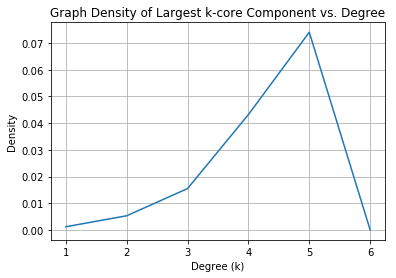

In [17]:
plt.plot(x_axis, y_axis)
plt.xlabel('Degree (k)')
plt.ylabel('Density')
plt.title('Graph Density of Largest k-core Component vs. Degree')
plt.grid(True)
plt.show()

In [18]:
five_component = nx.k_core(graph, k=5)

In [19]:
degree = nx.degree_centrality(five_component)
closeness = nx.closeness_centrality(five_component)
harmonic = nx.harmonic_centrality(five_component)
betweenness = nx.betweenness_centrality(five_component)
eigenvector = nx.eigenvector_centrality(five_component)
katz_01 = nx.katz_centrality_numpy(five_component, alpha=0.1)
katz_02 = nx.katz_centrality_numpy(five_component, alpha=0.2)
katz_001 = nx.katz_centrality_numpy(five_component, alpha=0.01)
katz_0001 = nx.katz_centrality_numpy(five_component, alpha=0.001)
katz_04 = nx.katz_centrality_numpy(five_component, alpha=0.4)
pagerank = nx.pagerank_numpy(five_component, alpha=0.85)

In [20]:
centrality_metrics = {'Degree': degree, 
                      'Closeness': closeness, 
                      'Harmonic': harmonic, 
                      'Betweenness': betweenness, 
                      'Eigenvector': eigenvector, 
                      'Katz alpha=0.1': katz_01, 
                      'Katz alpha=0.1': katz_02, 
                      'Katz alpha=0.01': katz_001, 
                      'Katz alpha=0.001': katz_0001, 
                      'Katz alpha=0.4': katz_04, 
                      'Pagerank': pagerank}

In [21]:
for metric_name in centrality_metrics:
    print(metric_name)
    metric = centrality_metrics[metric_name]
    top5 = {key: metric[key] for key in sorted(metric, key=metric.get, reverse=True)[:5]}
    rank = 1
    for key in sorted(top5, key=metric.get, reverse=True):
        print(rank, "\t",  key, "\t", top5[key])
        rank+=1
    print("\n")

Degree
1 	 K09B11.9 	 0.24074074074074073
2 	 T17H7.4 	 0.19444444444444442
3 	 F14F3.1 	 0.18518518518518517
4 	 ZK121.2 	 0.17592592592592593
5 	 T11B7.4 	 0.16666666666666666


Closeness
1 	 K09B11.9 	 0.5046728971962616
2 	 F14F3.1 	 0.4864864864864865
3 	 T17H7.4 	 0.4778761061946903
4 	 ZK121.2 	 0.47577092511013214
5 	 T11B7.4 	 0.4675324675324675


Harmonic
1 	 K09B11.9 	 63.00000000000006
2 	 F14F3.1 	 59.66666666666673
3 	 T17H7.4 	 59.416666666666735
4 	 ZK121.2 	 58.66666666666673
5 	 T11B7.4 	 57.50000000000008


Betweenness
1 	 K09B11.9 	 0.10875526983230903
2 	 F14F3.1 	 0.08677546399658279
3 	 T17H7.4 	 0.07544623639851308
4 	 T04H1.2 	 0.06479263186428481
5 	 ZK849.2 	 0.059716112104435275


Eigenvector
1 	 K09B11.9 	 0.29583954510987864
2 	 W05H7.4 	 0.2438907221730043
3 	 ZK121.2 	 0.23352419179098816
4 	 T17H7.4 	 0.22570297725368121
5 	 F14F3.1 	 0.22357805661960395


Katz alpha=0.1
1 	 C06A5.9 	 0.25997417136429135
2 	 F27C1.6 	 0.1743611197580395
3 	 H06I04.1 	 0